<a href="https://colab.research.google.com/github/MaCuur/AI_EGs/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM for begginers

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Dense, InputLayer, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

## Loading data

In [4]:
train = pd.read_csv('data/DailyDelhiClimateTrain.csv')
test = pd.read_csv('data/DailyDelhiClimateTest.csv')

In [7]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [8]:
print(f"train_shape: {train.shape}")
print(f"test_shape: {test.shape}")

train_shape: (1462, 5)
test_shape: (114, 5)


## Preprocessing

In [9]:
WINDOW_SIZE = 5

In [10]:
def data_to_input_and_output(data):

    input_data = []
    output_data = []
    for index in range(0, len(data) - WINDOW_SIZE):
        input_sample = data['meantemp'][index:index + WINDOW_SIZE]
        output_sample = data['meantemp'][index + WINDOW_SIZE]

        input_data.append(input_sample)
        output_data.append(output_sample)

    return np.array(input_data), np.array(output_data)

In [11]:
train_input, train_output = data_to_input_and_output(train)
test_input, test_output = data_to_input_and_output(test)

## Building and traing the neural network

In [20]:
#model = load_model('model/')
def train_neural_network(X, y, epochs=5, learning_rate=0.005):

    model = Sequential()
    model.add(InputLayer((WINDOW_SIZE, 1)))
    model.add(LSTM(64))
    model.add(Dense(8, 'relu'))
    model.add(Dense(1, 'linear'))

    check_point = ModelCheckpoint('model/model.keras', save_best_only=True, monitor='loss')
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=learning_rate), metrics=[RootMeanSquaredError()])
    model.fit(X, y, epochs=epochs, callbacks=[check_point])
    return model

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=model/

## Predictions

In [23]:
model = load_model('model/')

ValueError: File format not supported: filepath=model/. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(model/, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [24]:
train_pred = model.predict(train_input)
test_pred = model.predict(test_input)

NameError: name 'model' is not defined

In [27]:
def plot_predictions(pred, y_true, label, period):
    # Convert period to datetime if it's not already
    period = pd.to_datetime(period)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(period, y_true, label='True Values', marker='o', color='black')
    plt.plot(period, pred, label='Predictions', marker='o', color='red')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Mean temperature')
    plt.title(label)

    # Adding legend
    plt.legend()

    if label == "Train Data":
        # Format X-axis to show only years
        plt.gca().xaxis.set_major_locator(YearLocator())
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    elif label == "Test Data":
        # Format X-axis to show only months
        plt.gca().xaxis.set_major_locator(MonthLocator())
        plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

    # Rotate x-axis labels for better visibility
    plt.gcf().autofmt_xdate()

    # Show the plot
    plt.show()

In [28]:
train_period = train[0:len(train) - WINDOW_SIZE]['date']
test_period = test[0:len(test) - WINDOW_SIZE]['date']

plot_predictions(train_pred, train_output, 'Train Data', train_period)
plot_predictions(test_pred, test_output, 'Test Data', test_period)

NameError: name 'train_pred' is not defined

## How to predict the future?

In [29]:
predictions = []

def predict_the_future(input_seq, period_prediction: int = 7):
    if period_prediction == 0:
        return None
    new_prediction = model.predict(input_seq)
    predictions.append(new_prediction[0][0])

    # input_seq = [[0], [1], [2], [3], [4]]
    # prediction = [5]
    # --> new_seq = [[1], [2], [3], [4], [5]]
    new_seq = np.array([np.concatenate((input_seq[0][1:WINDOW_SIZE], new_prediction[0]))])

    predict_the_future(new_seq, period_prediction - 1)

In [30]:
seq_start = np.array([[15, 15.5, 16, 17, 18]])

if len(seq_start[0]) != WINDOW_SIZE:
    raise "Size mismatch"
predict_the_future(seq_start)

predictions

NameError: name 'model' is not defined

In [21]:
model = load_model('model/model.keras')

ValueError: File not found: filepath=model/model.keras. Please ensure the file is an accessible `.keras` zip file.

In [22]:
train_pred = model.predict(train_input)
test_pred = model.predict(test_input)

NameError: name 'model' is not defined

In [23]:
train_period = train[0:len(train) - WINDOW_SIZE]['date']
test_period = test[0:len(test) - WINDOW_SIZE]['date']

plot_predictions(train_pred, train_output, 'Train Data', train_period)
plot_predictions(test_pred, test_output, 'Test Data', test_period)

NameError: name 'plot_predictions' is not defined

In [24]:
WINDOW_SIZE = 5

In [25]:
def data_to_input_and_output(data):

    input_data = []
    output_data = []
    for index in range(0, len(data) - WINDOW_SIZE):
        input_sample = data['meantemp'][index:index + WINDOW_SIZE]
        output_sample = data['meantemp'][index + WINDOW_SIZE]

        input_data.append(input_sample)
        output_data.append(output_sample)

    return np.array(input_data), np.array(output_data)

In [26]:
train_input, train_output = data_to_input_and_output(train)
test_input, test_output = data_to_input_and_output(test)

In [27]:
def plot_predictions(pred, y_true, label, period):
    # Convert period to datetime if it's not already
    period = pd.to_datetime(period)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(period, y_true, label='True Values', marker='o', color='black')
    plt.plot(period, pred, label='Predictions', marker='o', color='red')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Mean temperature')
    plt.title(label)

    # Adding legend
    plt.legend()

    if label == "Train Data":
        # Format X-axis to show only years
        plt.gca().xaxis.set_major_locator(YearLocator())
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    elif label == "Test Data":
        # Format X-axis to show only months
        plt.gca().xaxis.set_major_locator(MonthLocator())
        plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

    # Rotate x-axis labels for better visibility
    plt.gcf().autofmt_xdate()

    # Show the plot
    plt.show()

In [31]:
model = load_model('model/model.keras')

ValueError: File not found: filepath=model/model.keras. Please ensure the file is an accessible `.keras` zip file.

In [29]:
train_pred = model.predict(train_input)
test_pred = model.predict(test_input)

NameError: name 'model' is not defined

In [30]:
train_period = train[0:len(train) - WINDOW_SIZE]['date']
test_period = test[0:len(test) - WINDOW_SIZE]['date']

plot_predictions(train_pred, train_output, 'Train Data', train_period)
plot_predictions(test_pred, test_output, 'Test Data', test_period)

NameError: name 'train_pred' is not defined

In [32]:
train_neural_network(train_input, train_output, epochs=100, learning_rate=0.005)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 603.8600 - root_mean_squared_error: 24.5506
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 191.6621 - root_mean_squared_error: 13.7211
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.2970 - root_mean_squared_error: 6.6250
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2871 - root_mean_squared_error: 2.4961
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6225 - root_mean_squared_error: 1.9011
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4959 - root_mean_squared_error: 1.8672
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8810 - root_mean_squared_error: 1.6969
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0885 - root_mean_squared_error: 1.7564
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0670 - root_mean_squared_error: 1.7506
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.9057 - root_mean_squared_error:

<Sequential name=sequential_5, built=True>

In [33]:
model = load_model('model/model.keras')

In [34]:
train_pred = model.predict(train_input)
test_pred = model.predict(test_input)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


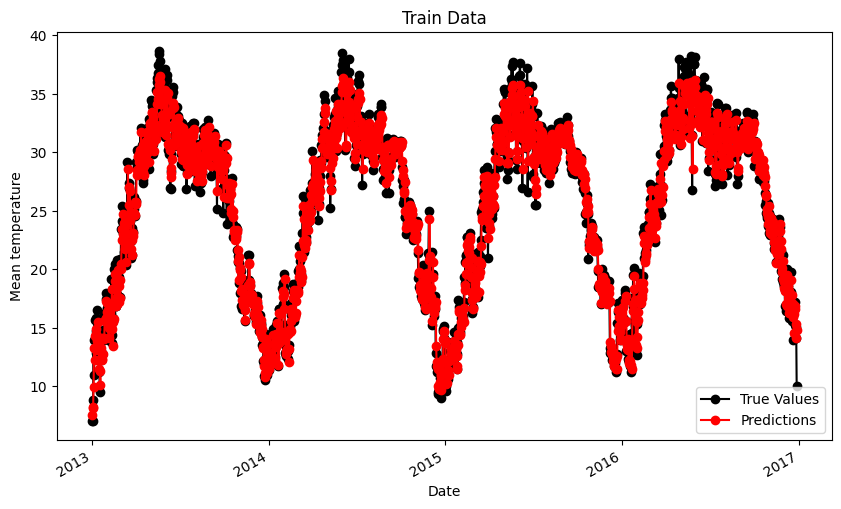

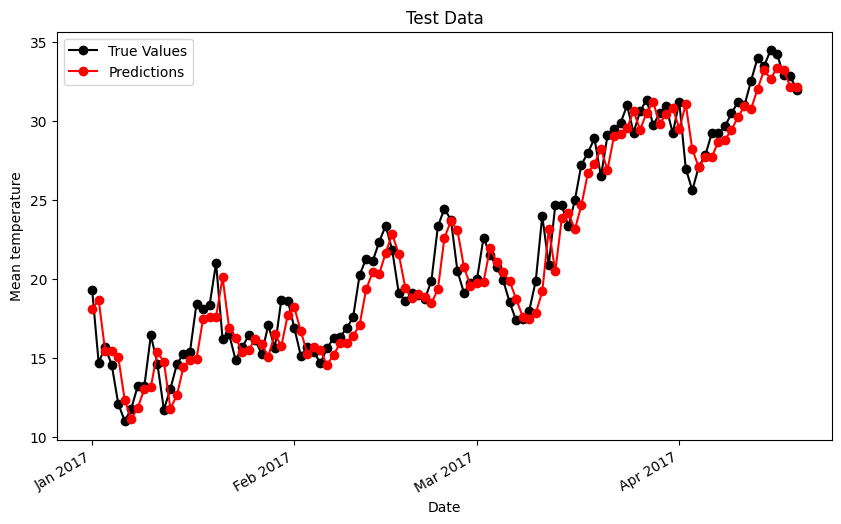

In [35]:
train_period = train[0:len(train) - WINDOW_SIZE]['date']
test_period = test[0:len(test) - WINDOW_SIZE]['date']

plot_predictions(train_pred, train_output, 'Train Data', train_period)
plot_predictions(test_pred, test_output, 'Test Data', test_period)

In [36]:
predictions = []

def predict_the_future(input_seq, period_prediction: int = 7):
    if period_prediction == 0:
        return None
    new_prediction = model.predict(input_seq)
    predictions.append(new_prediction[0][0])

    # input_seq = [[0], [1], [2], [3], [4]]
    # prediction = [5]
    # --> new_seq = [[1], [2], [3], [4], [5]]
    new_seq = np.array([np.concatenate((input_seq[0][1:WINDOW_SIZE], new_prediction[0]))])

    predict_the_future(new_seq, period_prediction - 1)

In [37]:
seq_start = np.array([[15, 15.5, 16, 17, 18]])

if len(seq_start[0]) != WINDOW_SIZE:
    raise "Size mismatch"
predict_the_future(seq_start)

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


[np.float32(17.371126),
 np.float32(17.004898),
 np.float32(16.710663),
 np.float32(16.613665),
 np.float32(16.511892),
 np.float32(16.3752),
 np.float32(16.21663)]